![](https://github.com/destination-earth/DestinE-DataLake-Lab/blob/main/img/DestinE-banner.jpg?raw=true)

**Licence**: MIT <br>

# Data Cube populated with data obtained from Weather and Geophysical Extremes Digital Twin (DT) - ExtremeDT

This notebook covers:
* find available data cubes and their urls
* upload data cube
* plot map for desired area, time and variable
* plot time series chart for selected variable in specifc time for specific location
* create interactive dashboard using xcube - xviewer

## Prepre your environment

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import dask
import requests

## Connect with Extreme DT data cube
**The data cube provides data:**
* Four variables
    * 2t - Air temperature at 2 meters above grond [K]
    * 2d - Dew point temperature at 2 meters above grond [K]
    * sp - Surface pressure [Pa]
* Forecast from 10.04.2024 + 96 hours
* Hourly step
* World

## Select proper data cube
Data cubes on s3 bucket are stored under URL https://s3.central.data.destination-earth.eu/swift/v1/dedl_datacube.  
Data cubes are stored in two directories:
* ExtremeDT - the newest one
* archive - from prievous days
     
<b>File nameing convention:</b>  
dt_extreme_YYYYMMDD.zarr/  
YYYYMMDD - is the date when forecast starts (step 0)  

<b>Results</b>  
After exectution of code below, the list of urls linked to available cubes will be printed.

In [2]:
# URL to s3 where  ExtremeDT data cubes are stored
datacube_url = 'https://s3.central.data.destination-earth.eu/swift/v1/dedl_datacube'
response = requests.get(datacube_url)

if response.status_code == 200:
    lines = response.text.splitlines()
    zarr_items = [line for line in lines if line.endswith(".zarr") or line.endswith(".zarr/")]
    if zarr_items:
        for item in zarr_items:
            print(item)
            new_url = f"{datacube_url}/{item}"
            print("New URL:", new_url)
    else:
        print("No .zarr files or directories found.")
else:
    print("Failed to fetch contents. Status code:", response.status_code)


ExtremeDT/dt_extreme_20240410.zarr/
New URL: https://s3.central.data.destination-earth.eu/swift/v1/dedl_datacube/ExtremeDT/dt_extreme_20240410.zarr/
archive/dt_extreme_20240409.zarr/
New URL: https://s3.central.data.destination-earth.eu/swift/v1/dedl_datacube/archive/dt_extreme_20240409.zarr/


Get info about the newset data cube.

In [3]:
# Paste into url variable link to the newest data cube
url = 'https://s3.central.data.destination-earth.eu/swift/v1/dedl_datacube/ExtremeDT/dt_extreme_20240410.zarr/'

## Let's make some test

### Area of interest
Upload data for selected area and verify what variables are provided. In this case uplaod data for Africa. List of available variables should be returend.

In [4]:
africa_bbox = [-20,     # West
                -40,    # South
                60,     # East
                40]     #North

africa_dt = xr.open_zarr(url).sel(lon=slice(africa_bbox[0], 
                                            africa_bbox[2]), 
                                lat=slice(africa_bbox[3], 
                                            africa_bbox[1]),
                                                         )

list(africa_dt.keys())

['2d', '2t', 'sp']

Plot map of air temperature for Africa.

Text(0, 0.5, 'Latitude')

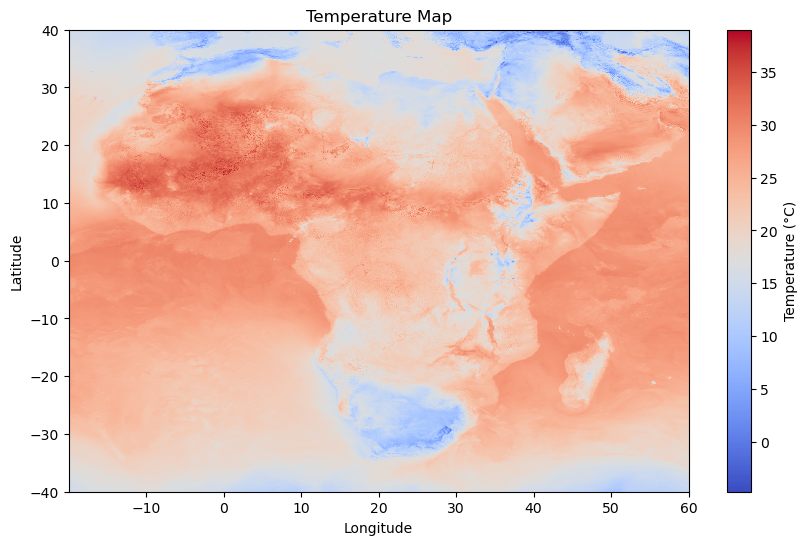

In [5]:
lon = africa_dt['lon']
lat = africa_dt['lat']
temperature = africa_dt['2t'][0, 0] - 273.15 # Conversion to Celcius degrees

plt.figure(figsize=(10, 6))
plt.pcolormesh(lon, lat, temperature, cmap='coolwarm')
plt.colorbar(label='Temperature (°C)')
plt.title('Temperature Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

## Get data for specific time range
Get data from 10st of April to 11th of April.

In [10]:
africa_bbox = [-20,     # West
                -40,    # South
                60,     # East
                40]     #North

africa_dt = xr.open_zarr(url).sel(lon=slice(africa_bbox[0], 
                                            africa_bbox[2]), 
                                lat=slice(africa_bbox[3], 
                                            africa_bbox[1]),
                                time=slice('20240410T000000', '20240411T000000')
                                                         )

print(africa_dt.time)

<xarray.DataArray 'time' (time: 25)>
array(['2024-04-10T00:00:00.000000000', '2024-04-10T01:00:00.000000000',
       '2024-04-10T02:00:00.000000000', '2024-04-10T03:00:00.000000000',
       '2024-04-10T04:00:00.000000000', '2024-04-10T05:00:00.000000000',
       '2024-04-10T06:00:00.000000000', '2024-04-10T07:00:00.000000000',
       '2024-04-10T08:00:00.000000000', '2024-04-10T09:00:00.000000000',
       '2024-04-10T10:00:00.000000000', '2024-04-10T11:00:00.000000000',
       '2024-04-10T12:00:00.000000000', '2024-04-10T13:00:00.000000000',
       '2024-04-10T14:00:00.000000000', '2024-04-10T15:00:00.000000000',
       '2024-04-10T16:00:00.000000000', '2024-04-10T17:00:00.000000000',
       '2024-04-10T18:00:00.000000000', '2024-04-10T19:00:00.000000000',
       '2024-04-10T20:00:00.000000000', '2024-04-10T21:00:00.000000000',
       '2024-04-10T22:00:00.000000000', '2024-04-10T23:00:00.000000000',
       '2024-04-11T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time 

## Obtain data for specific variable and time
Obtain surface pressure data from 10th of April to 11th of April.

In [11]:
africa_bbox = [-20,     # West
                -40,    # South
                60,     # East
                40]     #North

africa_dt = xr.open_zarr(url)['sp'].sel(lon=slice(africa_bbox[0], 
                                            africa_bbox[2]), 
                                lat=slice(africa_bbox[3], 
                                            africa_bbox[1]),
                                time=slice('20240410T000000', '20240411T000000')
                                                         )

print(africa_dt.var)

<bound method DataArrayAggregations.var of <xarray.DataArray 'sp' (time: 25, lat: 2276, lon: 2279)>
dask.array<getitem, shape=(25, 2276, 2279), dtype=float32, chunksize=(25, 417, 837), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 39.99 39.95 39.92 39.88 ... -39.92 -39.95 -39.99
  * lon      (lon) float64 -19.97 -19.94 -19.9 -19.87 ... 59.92 59.95 59.99
  * time     (time) datetime64[ns] 2024-04-10 2024-04-10T01:00:00 ... 2024-04-11
Attributes:
    CDI_grid_num_LPE:  2560
    CDI_grid_type:     gaussian
    long_name:         Surface pressure
    param:             0.3.0
    standard_name:     surface_air_pressure
    units:             Pa>


Plot map of surface pressure over Africa.

Text(0, 0.5, 'Latitude')

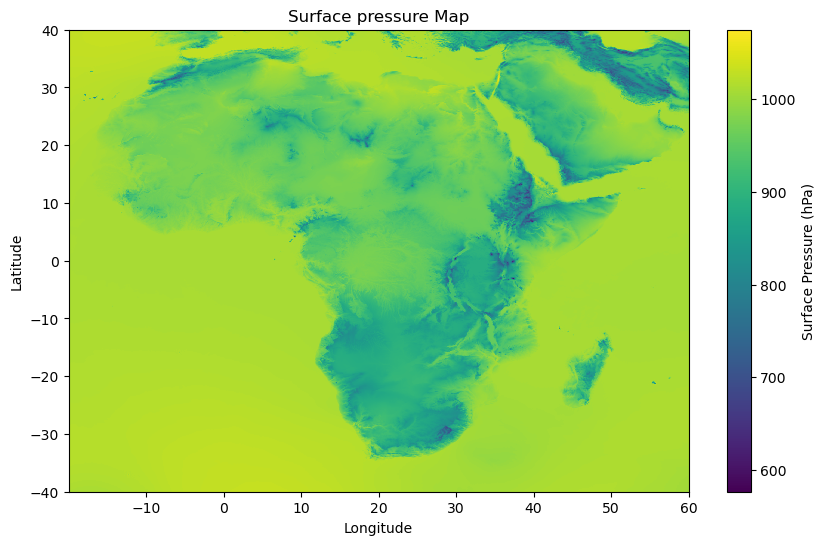

In [12]:
lon = africa_dt['lon']
lat = africa_dt['lat']
temperature = africa_dt[0] / 100    # Conversion to hectoPascals

plt.figure(figsize=(10, 6))
plt.pcolormesh(lon, lat, temperature, cmap='viridis')
plt.colorbar(label='Surface Pressure (hPa)')
plt.title('Surface pressure Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

## Time series
Verify if it is possible to create time series chart (for 96 hours) from DT output - air temperature over Nairobi.

In [13]:
africa_bbox = [-20,     # West
                -40,    # South
                60,     # East
                40]     #North

africa_dt = xr.open_zarr(url).sel(lon=slice(africa_bbox[0], 
                                            africa_bbox[2]), 
                                lat=slice(africa_bbox[3], 
                                            africa_bbox[1]),
                                )
                                                    

Create a chart.

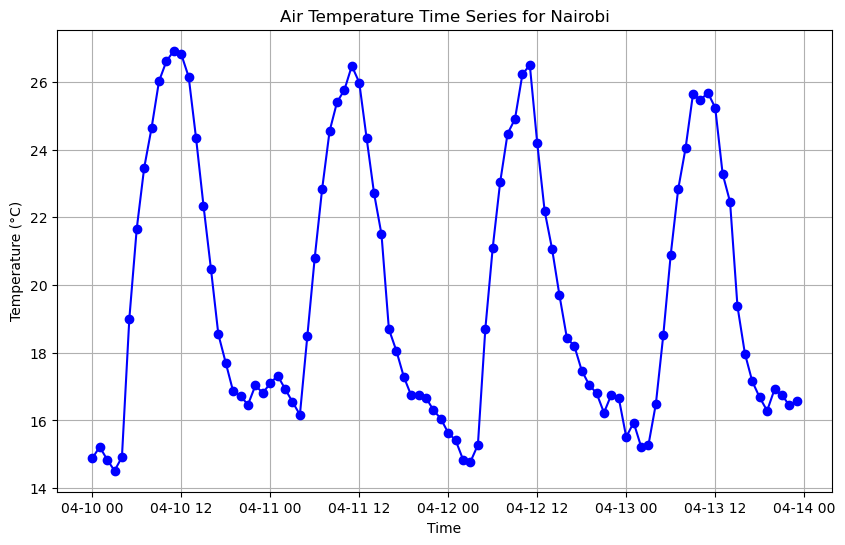

In [14]:
# Define Nairobi coordinates
nairobi_lat = -1.286389
nairobi_lon = 36.817223

lat = africa_dt['lat']
lon = africa_dt['lon']
nearest_lat_idx = np.abs(lat - nairobi_lat).argmin()
nearest_lon_idx = np.abs(lon - nairobi_lon).argmin()

temperature_nairobi = africa_dt['2t'][:, :, nearest_lat_idx, nearest_lon_idx] - 273.15
time_values = africa_dt.time.values

plt.figure(figsize=(10, 6))
plt.plot(time_values, temperature_nairobi, marker='o', color='b')
plt.title('Air Temperature Time Series for Nairobi')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()
